In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Kernel PCA

In [5]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf') # Radio basis function
# Each feature is a dimension. In training set, we have 10 feature.so, we get 10 dimension. PCA reduce 10D to 2D(2 extracted features)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Training Logistic Regression in training set

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/home/vinoth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

# Building Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

# Visualising training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


y_set.shape :  (142, 1)
y_set[0] :       Customer_Segment
161                 3


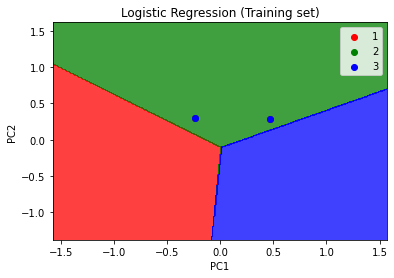

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
print('y_set.shape : ', y_set.shape)
print('y_set[0] : ', y_set.iloc[:1,:])
#print(X_set)
for i, j in enumerate(np.unique(y_set)):
    #print(y_set == j)
    plt.scatter(X_set[0], X_set[1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising test set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0 1
1 2
2 3


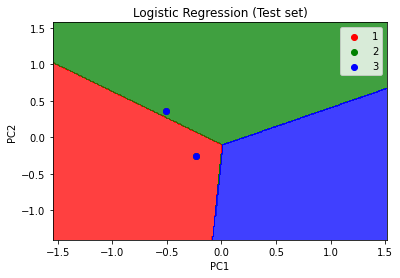

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    print(i, j)
    #print(y_set)
    plt.scatter(X_set[0], X_set[1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [14]:
print(y_set)

     Customer_Segment
54                  1
151                 3
63                  2
55                  1
123                 2
121                 2
7                   1
160                 3
106                 2
90                  2
141                 3
146                 3
5                   1
98                  2
168                 3
80                  2
33                  1
18                  1
61                  2
51                  1
66                  2
37                  1
4                   1
104                 2
60                  2
111                 2
126                 2
86                  2
112                 2
164                 3
26                  1
56                  1
129                 2
45                  1
8                   1
44                  1


In [16]:
print(X_set)

[[ 3.83960313  1.54567265]
 [-5.24601727  1.72358501]
 [ 0.66064228 -3.32231072]
 [ 2.16667061  1.0147427 ]
 [ 0.16079996 -1.27171643]
 [ 5.31374258 -2.22014536]
 [ 4.78386714  3.11508054]
 [-5.55863966  0.88556084]
 [ 1.29772139 -2.40714074]
 [-0.53068371 -2.37759837]
 [-2.36900593  1.81859204]
 [-5.14502202  1.88061526]
 [ 5.27947032  3.32510044]
 [ 2.70452577 -2.61522323]
 [-4.32314426  2.14569837]
 [ 0.65835601 -4.67751669]
 [ 4.07332713  1.95266123]
 [ 6.55291385  4.01098911]
 [-2.40020179 -1.14618328]
 [ 5.14219986  2.02120623]
 [ 2.46475469 -2.81225673]
 [ 2.5190649   1.07965428]
 [ 1.79798575  0.47987658]
 [ 1.43423986 -2.41298601]
 [-1.11433225 -0.98310413]
 [-0.28604133 -2.81262488]
 [ 1.21198193 -2.73115246]
 [-0.84900431 -3.34996047]
 [ 1.03105294 -0.53029203]
 [-4.83489722  2.08108766]
 [ 4.75464421  2.30157612]
 [ 3.33786142  1.51860576]
 [-1.02045007 -1.04261267]
 [ 3.1347464   2.97819832]
 [ 4.25385909  1.84683986]
 [ 3.16058359 -0.39860037]]
